# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [1]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)

#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [5]:
dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [6]:
registros_uf = dados['UF'].value_counts().reset_index()
registros_uf

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


In [7]:
dados['UF'].reset_index()

,index,UF
0,0,Rondônia
1,1,Rondônia
2,2,Rondônia
3,3,Rondônia
4,4,Rondônia
...,...,...
76835,76835,Distrito Federal
76836,76836,Distrito Federal
76837,76837,Distrito Federal
76838,76838,Distrito Federal


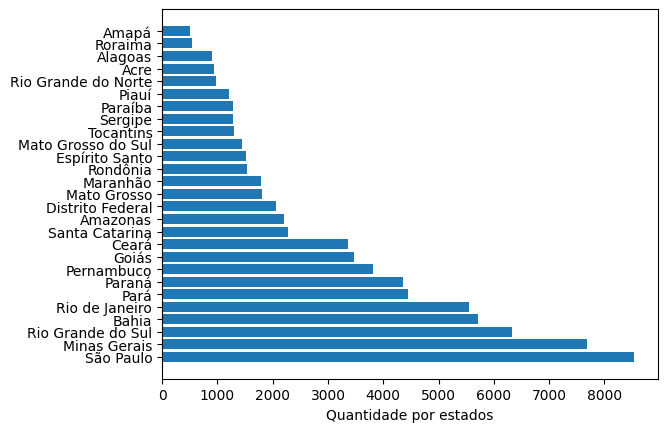

In [8]:
cont_estados = dados['UF'].value_counts().reset_index()


plt.barh(cont_estados['UF'], cont_estados['count'])
plt.xlabel('Quantidade por estados')
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [9]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

In [10]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


##### Sexo

In [11]:
dados['sexo_categorico'] = pd.Categorical(dados['Sexo'], categories=[0,1])
dados['sexo_categorico'] = dados['Sexo'].map(sexo)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino
1,Rondônia,1,23,2,12,1150,1.74,Feminino
2,Rondônia,1,35,8,15,880,1.76,Feminino
3,Rondônia,0,46,2,6,3500,1.78,Masculino
4,Rondônia,1,47,8,9,150,1.69,Feminino
...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino


##### Cor

In [12]:
dados['cor_categorico'] = pd.Categorical(dados['Cor'], categories=[0,2,4,6,8])

In [13]:
dados['cor_categorico'] = dados['Cor'].map(cor)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda
...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda


##### Anos de Estudo

In [14]:
dados['Anos.de.Estudo_categorico'] = pd.Categorical(dados['Anos.de.Estudo'], categories = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])

In [15]:
dados['Anos.de.Estudo_categorico'] = dados['Anos.de.Estudo'].map(anos_de_estudo)
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [16]:
print(f'A menor renda é de R$ {dados['Renda'].min():,.2f} e a maior é de R$ {dados['Renda'].max():,.2f}.')

A menor renda é de R$ 0.00 e a maior é de R$ 200,000.00.


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [17]:
freq_sexo = (dados.groupby('sexo_categorico', observed = False)
            .size()
            .reset_index(name = 'Frequência Absoluta'))
freq_sexo

,sexo_categorico,Frequência Absoluta
0,Feminino,23590
1,Masculino,53250


In [18]:
freq_sexo['Porcentagem (%)'] = round((freq_sexo['Frequência Absoluta']/ freq_sexo['Frequência Absoluta'].sum())*100, 2)
freq_sexo

,sexo_categorico,Frequência Absoluta,Porcentagem (%)
0,Feminino,23590,30.7
1,Masculino,53250,69.3


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [19]:
tabela_sexo_cor = pd.crosstab(dados['sexo_categorico'], dados['cor_categorico'])
tabela_sexo_cor

cor_categorico,Amarela,Branca,Indígena,Parda,Preta
sexo_categorico,,,,,
Feminino,117,9621,101,10862,2889
Masculino,235,22194,256,25063,5502


In [20]:
tabela_sexo_cor_relativa = round(pd.crosstab(dados['sexo_categorico'], dados['cor_categorico'], normalize = 'all') *100,2)

tabela_sexo_cor_relativa

cor_categorico,Amarela,Branca,Indígena,Parda,Preta
sexo_categorico,,,,,
Feminino,0.15,12.52,0.13,14.14,3.76
Masculino,0.31,28.88,0.33,32.62,7.16


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [21]:
renda_media = round(pd.crosstab(dados['sexo_categorico'], dados['cor_categorico'], values = dados['Renda'], aggfunc = 'mean'),2)

renda_media

cor_categorico,Amarela,Branca,Indígena,Parda,Preta
sexo_categorico,,,,,
Feminino,3027.34,2109.87,2464.39,1176.76,1134.60
Masculino,4758.25,2925.74,1081.71,1659.58,1603.86


> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [22]:
dados['Renda'].mean()

np.float64(2000.3831988547631)

In [23]:
dados['Renda'].median()

1200.0

In [24]:
dados['Renda'].mode()

,Renda
0,788


#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [25]:
#Calculando o top 5 Renda
top5_renda = dados.groupby('UF').agg(media = ('Renda', 'mean')).reset_index()

#Ordenando

top5_renda = round(top5_renda.sort_values(by = 'media', ascending = False).head(5),2)

top5_renda

,UF,media
6,Distrito Federal,4241.95
25,São Paulo,2638.10
20,Rio de Janeiro,2496.40
13,Paraná,2493.87
23,Santa Catarina,2470.85


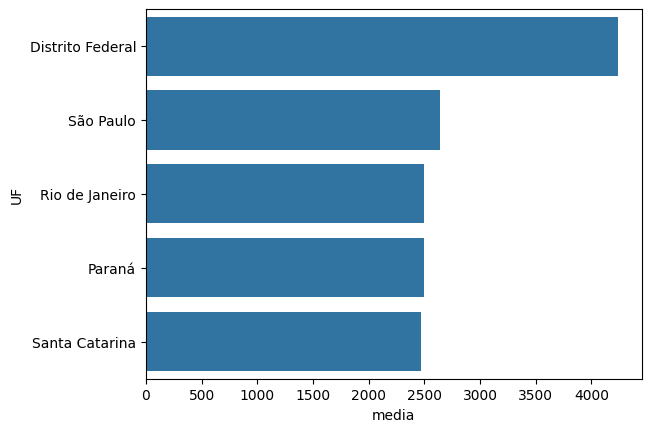

In [26]:
sns.barplot(data = top5_renda, y = 'UF', x = 'media')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [27]:
dados_sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]
dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,8 anos
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,11 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,11 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,4 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,15 anos ou mais


##### **Média**

In [28]:
dados_sudeste_media = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values = dados_sudeste['Renda'], aggfunc= 'mean'),2)
dados_sudeste_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Feminino,1752.71,1489.62,1971.53,1950.18
Masculino,2129.32,2283.16,2777.55,2947.74


##### **Mediana**

In [29]:
dados_sudeste_mediana = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values = dados_sudeste['Renda'], aggfunc= 'median'),2)
dados_sudeste_mediana

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Feminino,927.0,900.0,1040.5,1200.0
Masculino,1500.0,1400.0,1510.0,1820.0


##### **Renda Máxima**

In [30]:
dados_sudeste_media = round(pd.crosstab(dados_sudeste['sexo_categorico'], dados_sudeste['UF'], values = dados_sudeste['Renda'], aggfunc= 'max'),2)
dados_sudeste_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_categorico,,,,
Feminino,100000,30000,120000,50000
Masculino,40000,100000,200000,80000


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

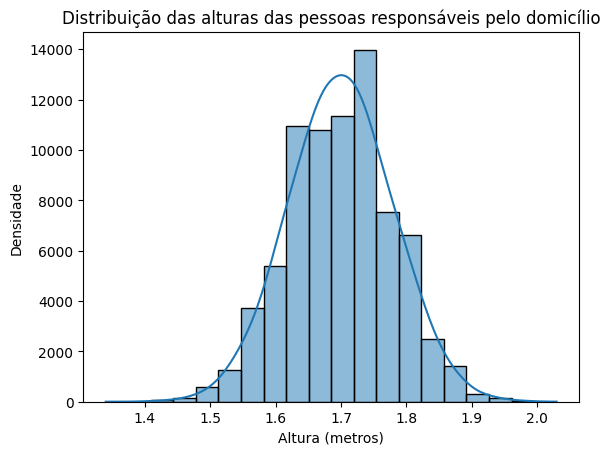

In [31]:
sns.histplot(bins = 20, data = dados, x = 'Altura', kde = True, kde_kws= {'bw_adjust':2})
plt.title('Distribuição das alturas das pessoas responsáveis pelo domicílio')
plt.xlabel('Altura (metros)')
plt.ylabel('Densidade')
plt.show()


In [32]:
altura_resumo = {
    'media' : dados['Altura'].mean(),
    'mediana' : dados['Altura'].median(),
    'moda' : dados['Altura'].mode()[0]

}

altura_resumo

{'media': np.float64(1.6995084591358667),
 'mediana': 1.7,
 'moda': np.float64(1.7)}

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

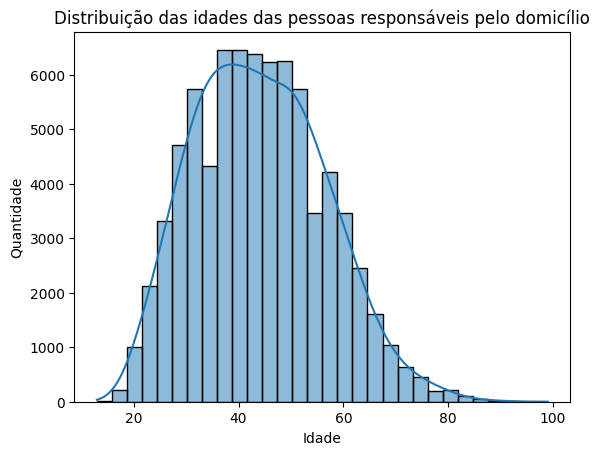

In [33]:
sns.histplot(bins = 30, data = dados, x = 'Idade', kde = True, kde_kws= {'bw_adjust':2})
plt.title('Distribuição das idades das pessoas responsáveis pelo domicílio')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

In [34]:
idade_resumo = {
    'media' : dados['Idade'].mean(),
    'mediana' : dados['Idade'].median(),
    'moda' : dados['Idade'].mode()[0]

}

idade_resumo

{'media': np.float64(44.07142113482561), 'mediana': 43.0, 'moda': np.int64(40)}

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [35]:
renda_15mil = dados[dados['Renda'] <=15000]
renda_15mil

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


In [36]:
n = len(renda_15mil)
n

76219

In [37]:
import math

k = 1 + (10/3)*math.log10(n)
k = int(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [38]:
renda_15mil['faixa_renda'] = pd.cut(renda_15mil['Renda'], bins = k, include_lowest= True)
renda_15mil

/tmp/ipython-input-1294380517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_15mil['faixa_renda'] = pd.cut(renda_15mil['Renda'], bins = k, include_lowest= True)


,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"
...,...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos,"(-15.001, 882.353]"
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos,"(882.353, 1764.706]"
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos,"(882.353, 1764.706]"
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos,"(882.353, 1764.706]"


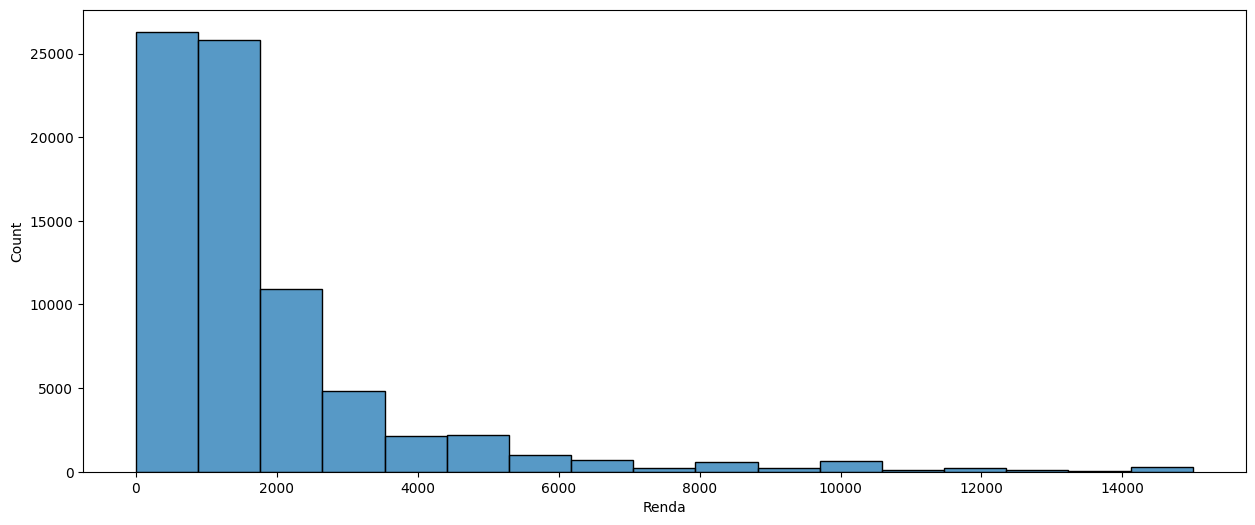

In [39]:
plt.figure(figsize=(15,6))
sns.histplot(data = renda_15mil, x = 'Renda', bins = k)
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [40]:
um_salario_min = dados[dados['Renda'] <= 788]
pessoas_salario_min = len(um_salario_min)
porcentagem_pessoas_salario_min = (pessoas_salario_min/len(dados))*100
porcentagem_pessoas_salario_min

28.86777719937533

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [41]:
noventa_cinco_porcento = dados['Renda'].quantile(0.95)
noventa_cinco_porcento

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [42]:
um_mais_bem_pago = dados['Renda'].quantile(0.99)
um_mais_bem_pago

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [43]:
dados['Renda'].describe()

,Renda
count,76840.000000
mean,2000.383199
std,3323.387730
min,0.000000
25%,788.000000
50%,1200.000000
75%,2000.000000
max,200000.000000


In [44]:
ate_6k = dados[dados['Renda'] <= 6000]
ate_6k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


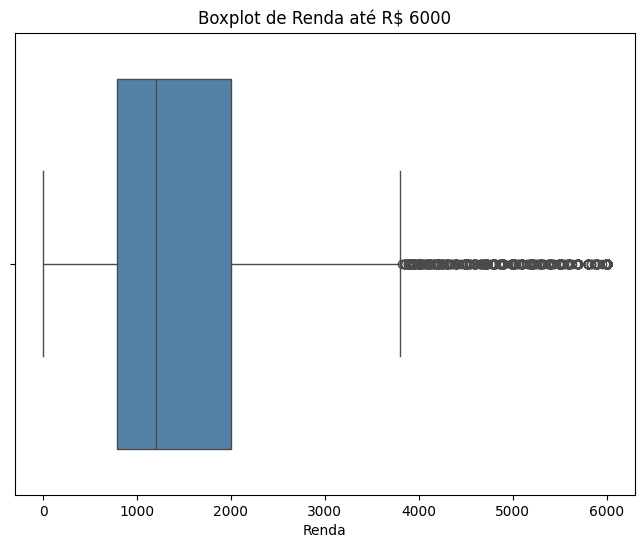

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x = ate_6k['Renda'], color='steelblue')

plt.title('Boxplot de Renda até R$ 6000')
plt.xlabel('Renda')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

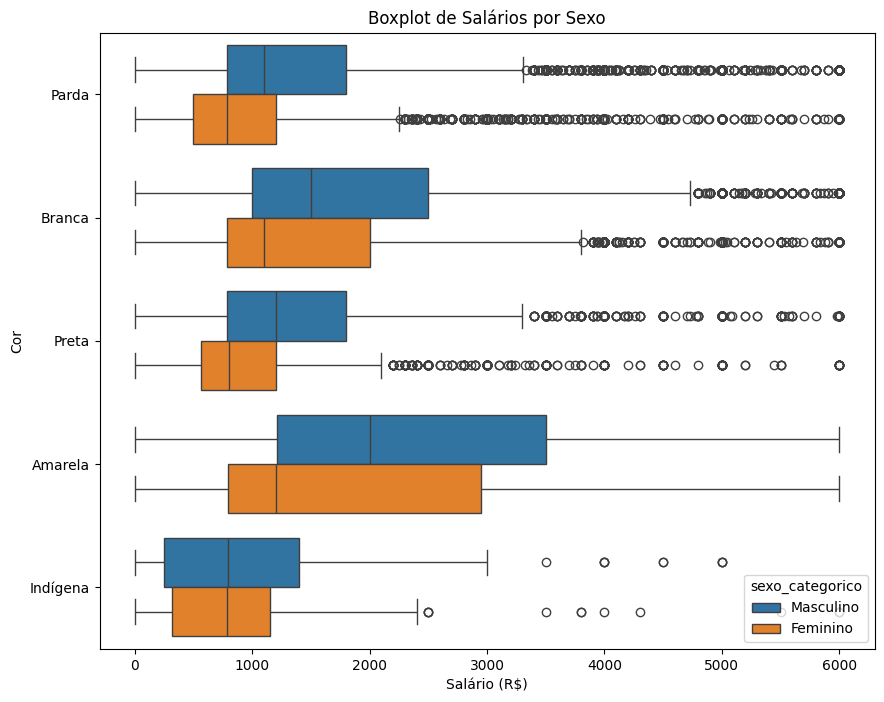

In [46]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(x='Renda', y='cor_categorico', data= ate_6k, hue='sexo_categorico')

plt.title('Boxplot de Salários por Sexo')
plt.xlabel('Salário (R$)')
plt.ylabel('Cor')

plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

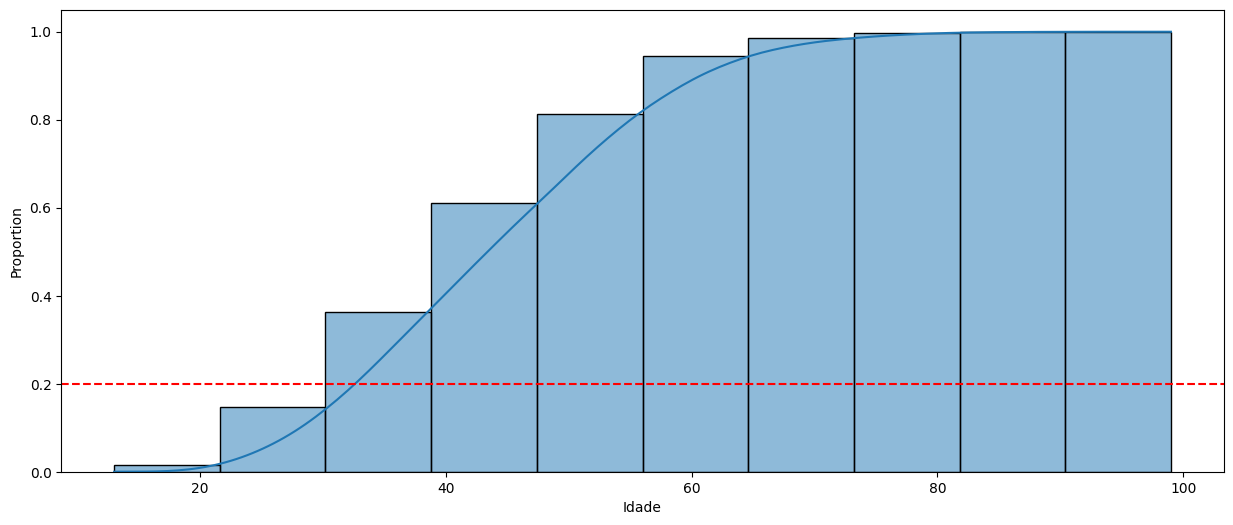

In [47]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [48]:
classificar_idades = dados.copy()
classificar_idades.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [49]:
classificar_idades = classificar_idades.sort_values(by = 'Idade')

classificar_idades['cumulativo'] = (classificar_idades.reset_index().index +1) / len(classificar_idades)

classificar_idades['Qualificado'] = classificar_idades['cumulativo'] <= 0.20

classificar_idades

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico,cumulativo,Qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True
...,...,...,...,...,...,...,...,...,...,...,...,...
10899,Tocantins,0,92,8,1,0,1.68,Masculino,Parda,Sem instrução e menos de 1 ano,0.999948,False
36162,Minas Gerais,0,94,2,4,0,1.80,Masculino,Branca,3 anos,0.999961,False
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False


In [50]:
idades_qualificadas = classificar_idades[classificar_idades['Qualificado'] == True]
idades_qualificadas

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico,cumulativo,Qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True
...,...,...,...,...,...,...,...,...,...,...,...,...
37555,Minas Gerais,0,33,8,12,788,1.60,Masculino,Parda,11 anos,0.199948,True
18203,Rio Grande do Norte,1,33,4,9,600,1.66,Feminino,Preta,8 anos,0.199961,True
18199,Rio Grande do Norte,1,33,8,7,200,1.54,Feminino,Parda,6 anos,0.199974,True
22744,Pernambuco,0,33,4,6,805,1.63,Masculino,Preta,5 anos,0.199987,True


In [51]:
idade_limite = idades_qualificadas['Idade'].max()
idade_limite

33

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [57]:
estatisticas_pop = dados['Renda'].agg(
  media = 'mean',
  mediana = 'median',
  desvio_padrao = 'std',
  variancia = 'var',
  mad = lambda x: (abs(x- x.mean())).mean()
).reset_index()

round(estatisticas_pop,2)


,index,Renda
0,media,2000.38
1,mediana,1200.00
2,desvio_padrao,3323.39
3,variancia,11044906.01
4,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [59]:
estatisticas_pop_anos_estudo = dados.groupby('Anos.de.Estudo', observed= False)['Renda'].agg(
    media = 'mean',
    mediana = 'median',
    desvio_padrao = 'std'
).reset_index()

estatisticas_pop_anos_estudo

,Anos.de.Estudo,media,mediana,desvio_padrao
0,1,732.994187,600.0,955.274843
1,2,806.524496,700.0,1203.866292
2,3,842.560209,788.0,1298.873800
3,4,980.044275,788.0,1907.138437
4,5,1150.439293,900.0,1293.144934
5,6,1183.575683,940.0,1328.709017
6,7,1284.082618,1000.0,1326.140204
7,8,1289.166233,1000.0,1279.412081
8,9,1437.744862,1100.0,1404.280340
9,10,1315.685870,1000.0,1888.373952


> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [60]:
estatisticas_renda_sexo = dados[dados['Renda']<=15000].groupby('sexo_categorico')['Renda'].agg(
    media = 'mean',
    mediana = 'median',
    desvio_padrao = 'std'
).reset_index()

estatisticas_renda_sexo

,sexo_categorico,media,mediana,desvio_padrao
0,Feminino,1460.143630,900.0,1763.686374
1,Masculino,1964.351997,1300.0,2101.163468


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [61]:
dados_centro_oeste = dados[dados['UF'].isin(['Mato Grosso', 'Mato Grosso do Sul', 'Goiás', 'Distrito Federal'])]
dados_centro_oeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
68068,Mato Grosso do Sul,0,53,2,12,1250,1.79,Masculino,Branca,11 anos
68069,Mato Grosso do Sul,0,19,2,9,764,1.75,Masculino,Branca,8 anos
68070,Mato Grosso do Sul,1,36,8,8,650,1.74,Feminino,Parda,7 anos
68071,Mato Grosso do Sul,0,31,2,9,5500,1.77,Masculino,Branca,8 anos
68072,Mato Grosso do Sul,1,51,8,6,400,1.82,Feminino,Parda,5 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


In [62]:
renda_centro_oeste_menor_10k = dados_centro_oeste[dados_centro_oeste['Renda'] <= 10000]
renda_centro_oeste_menor_10k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_categorico,cor_categorico,Anos.de.Estudo_categorico
68068,Mato Grosso do Sul,0,53,2,12,1250,1.79,Masculino,Branca,11 anos
68069,Mato Grosso do Sul,0,19,2,9,764,1.75,Masculino,Branca,8 anos
68070,Mato Grosso do Sul,1,36,8,8,650,1.74,Feminino,Parda,7 anos
68071,Mato Grosso do Sul,0,31,2,9,5500,1.77,Masculino,Branca,8 anos
68072,Mato Grosso do Sul,1,51,8,6,400,1.82,Feminino,Parda,5 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


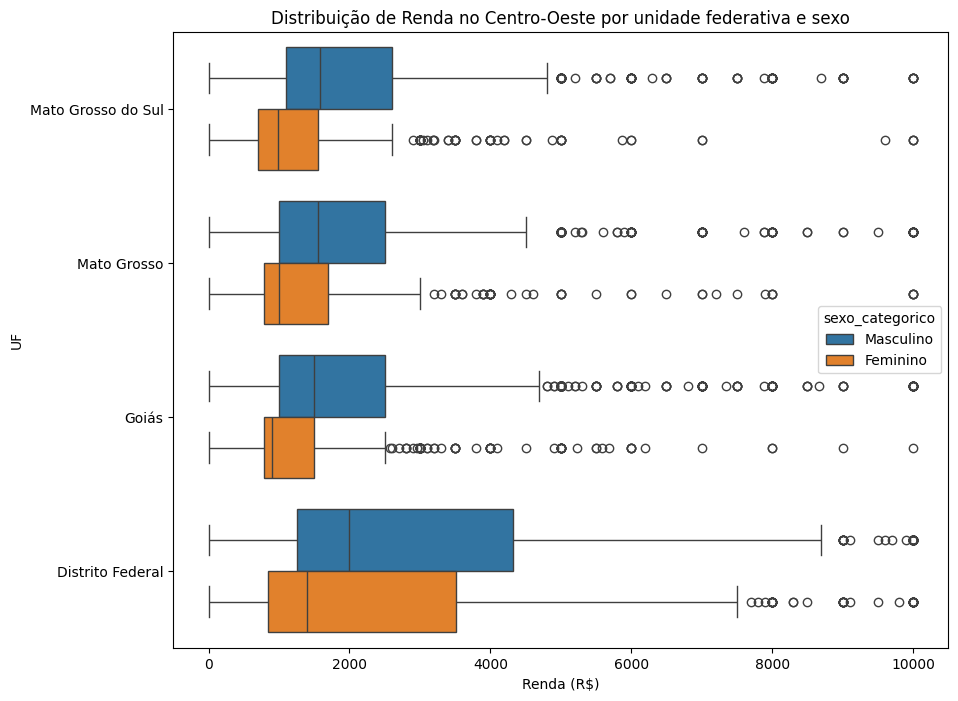

In [63]:
plt.figure(figsize=(10, 8))
sns.boxplot(data = renda_centro_oeste_menor_10k, x = 'Renda', y = 'UF', hue = 'sexo_categorico')

plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

plt.show()

##### **Média**

In [67]:
media_renda_centro_oeste = round(pd.crosstab(renda_centro_oeste_menor_10k['sexo_categorico'], renda_centro_oeste_menor_10k['UF'], values = renda_centro_oeste_menor_10k['Renda'], aggfunc = 'mean'),2)
media_renda_centro_oeste

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
sexo_categorico,,,,
Feminino,2551.87,1284.65,1548.93,1396.69
Masculino,3138.46,2030.06,2092.10,2181.73


##### **Mediana**

In [68]:
mediana_renda_centro_oeste = round(pd.crosstab(renda_centro_oeste_menor_10k['sexo_categorico'], renda_centro_oeste_menor_10k['UF'], values = renda_centro_oeste_menor_10k['Renda'], aggfunc = 'median'),2)
mediana_renda_centro_oeste

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
sexo_categorico,,,,
Feminino,1400.0,900.0,1000.0,986.0
Masculino,2000.0,1500.0,1560.0,1576.0


##### **Desvio Padrão**

In [69]:
desvio_padrao_renda_centro_oeste = round(pd.crosstab(renda_centro_oeste_menor_10k['sexo_categorico'], renda_centro_oeste_menor_10k['UF'], values = renda_centro_oeste_menor_10k['Renda'], aggfunc = 'std'),2)
desvio_padrao_renda_centro_oeste

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
sexo_categorico,,,,
Feminino,2451.17,1110.00,1508.59,1400.90
Masculino,2513.43,1587.38,1707.91,1773.44


> #### Conclusões

Escreva suas conclusões aqui...